$\newcommand{norm}[1]{||#1||}$
$\newcommand{mbx}{\mathbf x}$
$\newcommand{mbu}{\mathbf u}$
$\newcommand{d}{\text{div}}$
$\newcommand{mbf}{\mathbf f}$
$\newcommand{t}{\text{tr }}$
$\newcommand{mcA}{\mathcal A}$

# 线弹性问题

## 模型

$$
-\mu\Delta\mbu - (\lambda+\mu)\nabla\d\mbu = \mbf
$$

$$
A(\mbu) = \frac{\nabla\mbu + \nabla\mbu^T}{2}
$$

$$
\sigma(\mbu) = 2\mu A(\mbu) + \lambda(\t A(\mbu)) I
$$

$$
\mcA(\sigma) = \frac{1}{2\mu}\left(\sigma - \frac{\lambda}{n\lambda + 2\mu}(\t\sigma) I\right)
$$

$$
-\d\sigma(\mbu) = \mbf
$$

## 存在问题

* 解法器效率太低
* 矩阵组装基本是线性复杂度，但仍有改进空间
* 需要更多测试例子

## 测试模型数据

In [1]:
from IPython.display import display
from sympy import *
import numpy as np
init_printing()

def linear_elasticity_model(u, v):
    n = len(v)
    d, e = symbols('lam, mu')
    du = u.jacobian(v)
    Au = (du + du.transpose())/2
    sigma = d*Au.trace()*eye(n)+2*e*Au
    f = -diff(sigma[:, 0], v[0])
    for i in range(1, n):
        f -= diff(sigma[:, i], v[i])
    return f, du, sigma, d, e

def simplify_linear_elasticity_model(u, v):
    n = len(v)
    du = u.jacobian(v)
    sigma = du + du.transpose()
    f = -diff(sigma[:, 0], v[0])
    for i in range(1, n):
        f -= diff(sigma[:, i], v[i])
    return f, du, sigma

**例 1** 求解区域为 $\Omega = [0, 1]^3$
$$
\mbu = \begin{pmatrix}
2^4 \\ 2^5 \\ 2^6
\end{pmatrix}
x(1-x)y(1-y)z(1-z)
$$

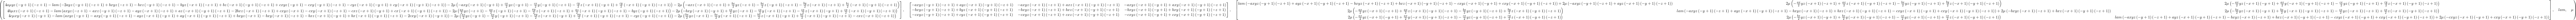

In [3]:
x, y, z, a, b, c= symbols('x, y, z, a, b, c')
u0 = x*(1-x)*y*(1-y)*z*(1-z)
u = Matrix([a, b, c])*u0
u.
f = linear_elasticity_model(u, (x, y, z))
display(f)

Construct linear system time: 1.659951514000113
Solve time: 0.08165926999981821
Construct linear system time: 13.403858605000096
Solve time: 2.987838785999884
Construct linear system time: 108.33645204000004
Solve time: 192.936152407
Ndof: [  750  4374 29478]
error: [[  1.39739596e+00   2.29570086e-01   2.73310407e-02]
 [  1.46080383e+01   4.92832365e+00   1.25911061e+00]
 [  9.33096445e-02   8.14716287e-03   5.08085642e-04]]

**例 2** 求解区域为 $\Omega = [0, 1]^3$

$$
u = \begin{pmatrix}
e^{x-y}x(1-x)y(1-y) \\
\sin(\pi x)\sin(\pi y)
\end{pmatrix}
$$

In [6]:
x, y = symbols('x, y')
u = Matrix([exp(x-y)*x*(1-x)*y*(1-y), sin(pi*x)*sin(pi*y)])
f, du, sigma= linear_elasticity_model(u, (x,y))
ss, cc, e, t0 = symbols('ss, cc, e, t0')
sub = {sin(pi*x)*sin(pi*y):ss, cos(pi*x)*cos(pi*y):cc, exp(x-y):e, (-x+1)*(-y+1):t0}
print(f, '\n')
print(du)

Matrix([[-lam*(x*y*(-x + 1)*(-y + 1)*exp(x - y) - 2*x*y*(-y + 1)*exp(x - y) + 2*y*(-x + 1)*(-y + 1)*exp(x - y) - 2*y*(-y + 1)*exp(x - y) + pi**2*cos(pi*x)*cos(pi*y)) - 2*mu*(x*y*(-x + 1)*(-y + 1)*exp(x - y) - 2*x*y*(-y + 1)*exp(x - y) + 2*y*(-x + 1)*(-y + 1)*exp(x - y) - 2*y*(-y + 1)*exp(x - y)) - 2*mu*(x*y*(-x + 1)*(-y + 1)*exp(x - y)/2 + x*y*(-x + 1)*exp(x - y) - x*(-x + 1)*(-y + 1)*exp(x - y) - x*(-x + 1)*exp(x - y) + pi**2*cos(pi*x)*cos(pi*y)/2)], [-lam*(-x*y*(-x + 1)*(-y + 1)*exp(x - y) - x*y*(-x + 1)*exp(x - y) + x*y*(-y + 1)*exp(x - y) + x*y*exp(x - y) + x*(-x + 1)*(-y + 1)*exp(x - y) - x*(-y + 1)*exp(x - y) - y*(-x + 1)*(-y + 1)*exp(x - y) - y*(-x + 1)*exp(x - y) + (-x + 1)*(-y + 1)*exp(x - y) - pi**2*sin(pi*x)*sin(pi*y)) - 2*mu*(-x*y*(-x + 1)*(-y + 1)*exp(x - y)/2 - x*y*(-x + 1)*exp(x - y)/2 + x*y*(-y + 1)*exp(x - y)/2 + x*y*exp(x - y)/2 + x*(-x + 1)*(-y + 1)*exp(x - y)/2 - x*(-y + 1)*exp(x - y)/2 - y*(-x + 1)*(-y + 1)*exp(x - y)/2 - y*(-x + 1)*exp(x - y)/2 + (-x + 1)*(-y + 1)

**例 3** 求解区域 $\Omega = [0, 1]^2$

$$
u = \frac{\pi}{2}\begin{pmatrix}
\sin^2(\pi x)\sin(2\pi y)\\
-\sin^2(\pi y)\sin(2\pi x)
\end{pmatrix}
$$

In [14]:
x, y = symbols('x, y')
u = pi/2*Matrix([sin(pi*x)**2*sin(2*pi*y), -sin(pi*y)**2*sin(2*pi*x)])
f, du, sigma, d, e= linear_elasticity_model(u, (x,y))
print(f, '\n')
print(du)

Matrix([[-lam*(-pi**3*sin(pi*x)**2*sin(2*pi*y) - 2*pi**3*sin(pi*y)*cos(2*pi*x)*cos(pi*y) + pi**3*sin(2*pi*y)*cos(pi*x)**2) - 2*mu*(-pi**3*sin(pi*x)**2*sin(2*pi*y) - pi**3*sin(pi*y)*cos(2*pi*x)*cos(pi*y)) + 2*pi**3*mu*sin(pi*x)**2*sin(2*pi*y) - 2*pi**3*mu*sin(2*pi*y)*cos(pi*x)**2], [-lam*(2*pi**3*sin(pi*x)*cos(pi*x)*cos(2*pi*y) + pi**3*sin(2*pi*x)*sin(pi*y)**2 - pi**3*sin(2*pi*x)*cos(pi*y)**2) - 2*mu*(pi**3*sin(pi*x)*cos(pi*x)*cos(2*pi*y) + pi**3*sin(2*pi*x)*sin(pi*y)**2) - 2*pi**3*mu*sin(2*pi*x)*sin(pi*y)**2 + 2*pi**3*mu*sin(2*pi*x)*cos(pi*y)**2]]) 

Matrix([[pi**2*sin(pi*x)*sin(2*pi*y)*cos(pi*x), pi**2*sin(pi*x)**2*cos(2*pi*y)], [-pi**2*sin(pi*y)**2*cos(2*pi*x), -pi**2*sin(2*pi*x)*sin(pi*y)*cos(pi*y)]])


## 简化模型求解

$$
-\Delta \mbu - \nabla \d \mbu= \mbf
$$

$$
\sigma (\mbu) = \nabla\mbu + \nabla\mbu^T
$$

$$
-\d\sigma (\mbu) = \mbf
$$

**例 2** 求解区域为 $\Omega = [0, 1]^3$

$$
u = \begin{pmatrix}
e^{x-y}x(1-x)y(1-y) \\
\sin(\pi x)\sin(\pi y)
\end{pmatrix}
$$

In [5]:
x, y = symbols('x, y')
u = Matrix([exp(x-y)*x*(1-x)*y*(1-y), sin(pi*x)*sin(pi*y)])
f, du, sigma= simplify_linear_elasticity_model(u, (x,y))
ss, cc, e, t0 = symbols('ss, cc, e, t0')
sub = {sin(pi*x)*sin(pi*y):ss, cos(pi*x)*cos(pi*y):cc, exp(x-y):e, (-x+1)*(-y+1):t0}
print(f, '\n')
print(f.subs(sub), '\n')
print(du)

Matrix([[-3*x*y*(-x + 1)*(-y + 1)*exp(x - y) - 2*x*y*(-x + 1)*exp(x - y) + 4*x*y*(-y + 1)*exp(x - y) + 2*x*(-x + 1)*(-y + 1)*exp(x - y) + 2*x*(-x + 1)*exp(x - y) - 4*y*(-x + 1)*(-y + 1)*exp(x - y) + 4*y*(-y + 1)*exp(x - y) - pi**2*cos(pi*x)*cos(pi*y)], [x*y*(-x + 1)*(-y + 1)*exp(x - y) + x*y*(-x + 1)*exp(x - y) - x*y*(-y + 1)*exp(x - y) - x*y*exp(x - y) - x*(-x + 1)*(-y + 1)*exp(x - y) + x*(-y + 1)*exp(x - y) + y*(-x + 1)*(-y + 1)*exp(x - y) + y*(-x + 1)*exp(x - y) - (-x + 1)*(-y + 1)*exp(x - y) + 3*pi**2*sin(pi*x)*sin(pi*y)]]) 

Matrix([[-pi**2*cc - 3*e*t0*x*y + 2*e*t0*x - 4*e*t0*y - 2*e*x*y*(-x + 1) + 4*e*x*y*(-y + 1) + 2*e*x*(-x + 1) + 4*e*y*(-y + 1)], [e*t0*x*y - e*t0*x + e*t0*y - e*t0 + e*x*y*(-x + 1) - e*x*y*(-y + 1) - e*x*y + e*x*(-y + 1) + e*y*(-x + 1) + 3*pi**2*ss]]) 

Matrix([[x*y*(-x + 1)*(-y + 1)*exp(x - y) - x*y*(-y + 1)*exp(x - y) + y*(-x + 1)*(-y + 1)*exp(x - y), -x*y*(-x + 1)*(-y + 1)*exp(x - y) - x*y*(-x + 1)*exp(x - y) + x*(-x + 1)*(-y + 1)*exp(x - y)], [pi*sin(pi*y)*

# 快速算法

$$
\begin{pmatrix}
A & B^T\\ B & -C
\end{pmatrix}
\begin{pmatrix}
x_0 \\ x_1
\end{pmatrix}
= \begin{pmatrix}
0 \\ b
\end{pmatrix}
$$

$$
\begin{pmatrix}
A & B^T\\ B & -C
\end{pmatrix}^{-1}
= 
\begin{pmatrix}
I & A^{-1}B^T \\ 0 & -I
\end{pmatrix}
\begin{pmatrix}
A & 0 \\ B & S
\end{pmatrix}^{-1}
$$

其中 $S = BA^{-1}B^T+C$

$$
\begin{pmatrix}
D & B^T\\ B & -C
\end{pmatrix}^{-1}
= 
\begin{pmatrix}
I & D^{-1}B^T \\ 0 & -I
\end{pmatrix}
\begin{pmatrix}
D & 0 \\ B & \tilde S
\end{pmatrix}^{-1}
$$

其中 $\tilde S = BD^{-1}B^T+C$

核心需要实现的计算是：

$$
\begin{pmatrix}
D & 0 \\ B & \tilde S
\end{pmatrix}
\begin{pmatrix}
u_0 \\ u_1
\end{pmatrix}
=\begin{pmatrix}
r_0 \\ r_1
\end{pmatrix}
$$

易知

$$
u_0 = D^{-1} r_0
$$

进而用代数多重网格可求解下面方程：

$$
\tilde S u_1 = r_1 - BD^{-1}r_0:=r_2
$$

**Step 1:** GS 前磨光
$$
u_1^1 = u_1^0 + G( r_2 - \tilde S u_1^0)
$$

**Step 2：** 粗空间 AMG 校正
$$
u_1^2 = u_1^1 + \Pi M \Pi^T(r_2 - \tilde S u_1^1)
$$

**Step 3：** GS 后磨光
$$
u_1^3 = u_1^2 + G^T(r_2 - \tilde S u_1^2)
$$